In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

### Часть 1

Начисление баллов студенту:
- получить рубежные баллы для квантильных оценок (см. таблицу по квантильной оценке)
- присвоить студенту набранные баллы 
- вывести результат в виде 4 отдельных таблиц для оценок «отлично», «хорошо», «удовлетворительно», «неудовлетворительно», каждая таблица состоит из 4х столбцов: индекс студента, ФИО студента, оценка по 10 бальной системе, оценка в традиционной системе («отлично», «хорошо», «удовлетворительно», «неудовлетворительно»). Внутри таблицы столбцы упорядочены по 10 бальной оценке (от большего к меньшему), а среди равных по алфавиту для фамилий (от меньшего к большему).

Таблица. Квантильная оценка. (https://tabletomarkdown.com/convert-spreadsheet-to-markdown/)

| Правильные ответы   | 10 бальная шкала | Традиционная шкала | Процентильный расчет        |
| ------------------- | ---------------- | ------------------ | --------------------------- |
| 0                   | 0                | неудовлет.         |                             |
| 1                   | 1                | неудовлет.         |                             |
| 2-3                 | 2                | неудовлет.         |                             |
| 4                   | 3                | неудовлет.         |                             |
| \[5,Rb4)            | 4                | удовл.             | Rb4 = Процентиль(stat, 1/6) |
| \[RB4,Rb5)          | 5                | удовл.             | Rb5 =Процентиль(stat, 1/3)  |
| \[RB5,Rb6)          | 6                | хорошо             | Rb6 = Процентиль(stat, 1/2) |
| \[RB6,Rb7)          | 7                | хорошо             | Rb7 = Процентиль(stat, 2/3) |
| \[RB7,Rb8)          | 8                | отлично            | Rb8 = Процентиль(stat, 7/9) |
| \[RB80,Rb9)         | 9                | отлично            | Rb9 = Процентиль(stat, 8/9) |
| Более или равно RB9 | 10               | отлично            |                             |


In [147]:
#ваш код

table = pd.ExcelFile('GOS 2019 for AD.xlsx')
df1 = pd.read_excel(table, 'Вариант 1')
df2 = pd.read_excel(table, 'Вариант 2')
df3 = pd.read_excel(table, 'Вариант 3')
df4 = pd.read_excel(table, 'Вариант 4')
df5 = pd.read_excel(table, 'Соответствие вариантов').iloc[:40, :4].astype(int) - 1

t1 = df1.iloc[:,2:].isin(df1['Верный ответ'])
t2 = df2.iloc[:,2:].isin(df2['Верный ответ']).set_index(df5['Вариант 2']).sort_index()
t3 = df3.iloc[:,2:].isin(df3['Верный ответ']).set_index(df5['Вариант 3']).sort_index()
t4 = df4.iloc[:,2:].isin(df4['Верный ответ']).set_index(df5['Вариант 4']).sort_index()
lists = [t1,t2,t3,t4]
t = pd.concat(lists, axis = 1)
t

marks = t.sum(axis = 0)
marks
course = t.sum(axis = 1)
course


perc = marks.quantile([1/6,1/3,1/2,2/3,7/9,8/9], interpolation = 'lower')
perc = perc.values

list = []

def get_mark(a):
    if (a == 0 or a == 1):
        return(a)
    if (a == 2 or a == 3):
        return(2)
    if (a == 4):
        return(3)
    if (a >= 5 and a < perc[0]):
        return(4)
    if (a >= perc[0] and a < perc[1]):
        return(5)
    if (a >= perc[1] and a < perc[2]):
        return(6)
    if (a >= perc[2] and a < perc[3]):
        return(7)
    if (a >= perc[3] and a < perc[4]):
        return(8)
    if (a >= perc[4] and a < perc[5]):
        return(9)
    if (a >= perc[5]):
        return(10)    

def get_mar(a):
    if (a <= 3):
        return('неудовл')
    if (a > 3 and a <= 5):
        return('удовл')
    if (a > 5 and a <= 7):
        return('хорошо')
    if (a > 7):
        return('отлично')
    
    
ddd = pd.DataFrame()
ddd['marks'] = marks.apply(get_mark)
ddd = ddd.reset_index().sort_values(by = ['marks','index'], ascending = [False, True])
ddd['marks_traditional'] = ddd['marks'].apply(get_mar)
#ddd = ddd.rename(columns = {'index' : 'Name'}, inplace = True)
ddd

,index,marks,marks_traditional
6,student107,10,отлично
12,student113,10,отлично
16,student201,10,отлично
18,student203,10,отлично
19,student204,10,отлично
...,...,...,...
35,student302,4,удовл
36,student303,4,удовл
43,student310,4,удовл
52,student401,4,удовл


### Часть 2

Анализ результатов по кафедрам и вопросам:
- проанализировать статистики ответов по различным дисциплинам (важно вопросы перепутаны, ключ в на 5 вкладке таблицы ответов)
- визуализировать статистики ответов по различным дисциплинам
- построить таблицу для каждой дисциплины в отдельности (ключ по дисциплинам на 5 вкладке таблицы ответов) по сложности вопросов. В столбцах номер вопроса, количество правильных ответов, процент правильно ответивших. Упорядочить таблицы от самого простого к самому сложному.


,how many,perc
2,17,0.250
4,19,0.279
8,23,0.338
3,25,0.368
0,28,0.412
7,34,0.500
1,38,0.559
5,41,0.603
6,41,0.603
9,51,0.750


,course,perc
9,16,0.235
7,33,0.485
8,33,0.485
5,43,0.632
1,44,0.647
6,44,0.647
4,47,0.691
3,48,0.706
0,54,0.794
2,61,0.897


,course,perc
4,29,0.426
0,41,0.603
1,41,0.603
5,44,0.647
7,46,0.676
9,47,0.691
6,48,0.706
3,50,0.735
2,53,0.779
8,53,0.779


,course,perc
4,29,0.426
0,41,0.603
1,41,0.603
5,44,0.647
7,46,0.676
9,47,0.691
6,48,0.706
3,50,0.735
2,53,0.779
8,53,0.779


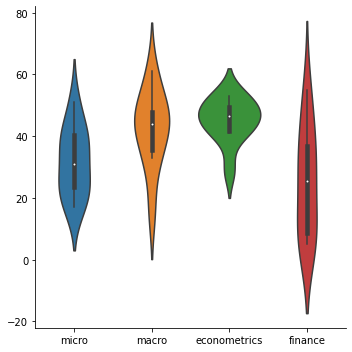

In [218]:
#ваш код
#questions = pd.DataFrame()

questions['micro'] = course[0:10].values 
questions['macro'] = course[10:20].values
questions['econometrics'] = course[20:30].values
questions['finance'] = course[30:40].values
questions

sns.catplot(kind = 'violin', data = questions);


micro = pd.DataFrame()
micro['how many'] = course[0:10].values
micro = micro.reset_index(drop = True)
micro['perc'] = np.around(micro['how many'] / 68, decimals = 3)
micro = micro.sort_values('perc')
display(micro)

macro = pd.DataFrame()
macro['course'] = course[10:20].values
macro = macro.reset_index(drop = True)
macro['perc'] = np.around(macro['course'] / 68, decimals = 3)
macro = macro.sort_values('perc')
display(macro)

econ = pd.DataFrame()
econ['course'] = course[20:30].values
econ = econ.reset_index(drop = True)
econ['perc'] = np.around(econ['course'] / 68, decimals = 3)
econ = econ.sort_values('perc')
display(econ)

fin = pd.DataFrame()
fin['course'] = course[20:30].values
fin = fin.reset_index(drop = True)
fin['perc'] = np.around(fin['course'] / 68, decimals = 3)
fin = fin.sort_values('perc')
fin
